In [ ]:
import numpy as np
import os
import quant_rotor.core.hamiltonian as h
import matplotlib.pyplot as plt

# Density matrices. (Work)

In [21]:
state = 11
site = 3

g = 0.1

In [26]:
H = h.hamiltonian(state, site, g, clean=True)[0]

eig_val, eig_vec = np.linalg.eig(H)

In [27]:
V = h.write_matrix_elements(2)[1]

In [5]:
121*121

14641

In [6]:
V.shape

(25, 25)

In [7]:
V_new = V.reshape(5,5,5,5)

In [2]:
def density_matrix(states: int, sites: int, eigvector: np.ndarray, choose_site: int) -> np.ndarray:

    # Reduced density matrix for chosen site (states x states)
    D = np.zeros((states, states), dtype=complex)

    n_lambda = states**(choose_site)
    n_mu = states**(sites - choose_site - 1)

    # Loop over the local states at the chosen site
    for p in range(states):
        for p_prime in range(states):
            val = 0.0

            # Sum over all other sites (Lambda and mu represent other sites)
            for Lambda in range(int(n_lambda)):
                for mu in range(int(n_mu)):

                    # Full indices in the Hilbert space
                    i = mu + p * n_mu + Lambda * states * n_mu
                    j = mu + p_prime * n_mu + Lambda * states * n_mu

                    # Accumulate contribution from the eigenvector
                    val += eigvector.conj()[i] * eigvector[j]

            # Set the computed value into the reduced density matrix
            D[p, p_prime] = val

    return D

In [4]:
index = np.argsort(eig_val)

# Get ground state (or any eigenstate)
psi_vec = eig_vec[:, index[0]]  # choose whichever eigenstate

print(psi_vec.shape)

# D_new = np.tensordot(eigvector.conj(), eigvector, axes=0)
# Reshape into tensor form for multi-site system
# psi_tensor = psi_vec.reshape([state] * site)

# Use the reduced density matrix function
rho_site_0 = density_matrix(state, site, psi_vec, 0)


# print(np.allclose(rho_site_0, rho_site_1))

eig_val_D, eig_vec_D = np.linalg.eig(rho_site_0)
total = np.sum(eig_val_D)
print(total)

eig_val_D

(1331,)
(0.9999999999999994+0j)


array([0.992859707+0.j, 0.006034995+0.j, 0.000002021+0.j, 0.00110235 +0.j, 0.000000928+0.j, 0.         +0.j, 0.         +0.j, 0.         +0.j, 0.         +0.j, 0.         +0.j, 0.         +0.j])

# Density Matrix. (Finished)

In [3]:
def density_matrix(states: int, sites: int, eigvector: np.ndarray, choose_site: int) -> np.ndarray:

    # Reduced density matrix for chosen site (states x states)
    D = np.zeros((states, states), dtype=complex)

    n_lambda = states**(choose_site)
    n_mu = states**(sites - choose_site - 1)

    # Loop over the local states at the chosen site
    for p in range(states):
        for p_prime in range(states):
            val = 0.0

            # Sum over all other sites (Lambda and mu represent other sites)
            for Lambda in range(int(n_lambda)):
                for mu in range(int(n_mu)):

                    # Full indices in the Hilbert space
                    i = mu + p * n_mu + Lambda * states * n_mu
                    j = mu + p_prime * n_mu + Lambda * states * n_mu

                    # Accumulate contribution from the eigenvector
                    val += eigvector.conj()[i] * eigvector[j]

            # Set the computed value into the reduced density matrix
            D[p, p_prime] = val

    return D

# Density matrix analysis. (Work)

In [8]:
# def nonzero_nondegenaret(eigen_val: np.ndarray, eige_vec_slice: np.ndarray, threshold: float = 1e-13) -> np.ndarray:
#     # Step 1: Find indices of values significantly different from 0
#     nonzero_indices = np.where(np.abs(eige_vec_slice) > threshold)[0]

#     # Step 2: Identify repeated eigenvalues
#     unique_vals, counts = np.unique(eigen_val, return_counts=True)
#     repeated_vals = set(unique_vals[counts > 1])

#     # Step 3: Filter out indices with repeated eigenvalues
#     unique_indices = [i for i in nonzero_indices if eigen_val[i] not in repeated_vals]

#     # Step 4: Sort remaining indices by increasing eigenvalue
#     sorted_indices = np.array(unique_indices)[np.argsort(eigen_val[unique_indices])]

#     return sorted_indices

In [3]:
def non_zero(eige_vec_slice: np.ndarray, sort: bool=False, eigen_val: np.ndarray=[], threshold: float = 1e-13) -> np.ndarray:

    nonzero_indices = np.where(np.abs(eige_vec_slice) > threshold)[0]

    if sort:
        nonzero_indices = np.array(nonzero_indices)[np.argsort(eigen_val[nonzero_indices])]

    return nonzero_indices

def zero(eige_vec_slice: np.ndarray, sort: bool=False, eigen_val: np.ndarray=[], threshold: float = 1e-13) -> np.ndarray:

    nonzero_indices = np.where(np.abs(eige_vec_slice) < threshold)[0]

    if sort:
        nonzero_indices = np.array(nonzero_indices)[np.argsort(eigen_val[nonzero_indices])]

    return nonzero_indices

In [4]:
def degenaret_increasing(eigen_val: np.ndarray, indices: np.ndarray, threshold: float = 1e-13) -> np.ndarray:

    unique_vals, counts = np.unique(eigen_val, return_counts=True)
    repeated_vals = set(unique_vals[counts > 1])

    unique_indices = [i for i in indices if eigen_val[i] in repeated_vals]

    sorted_indices = np.array(unique_indices)[np.argsort(eigen_val[unique_indices])]

    return sorted_indices

def non_degenaret_increasing(eigen_val: np.ndarray, indices: np.ndarray, threshold: float = 1e-13) -> np.ndarray:

    unique_vals, counts = np.unique(eigen_val, return_counts=True)
    repeated_vals = set(unique_vals[counts > 1])

    unique_indices = [i for i in indices if eigen_val[i] not in repeated_vals]

    sorted_indices = np.array(unique_indices)[np.argsort(eigen_val[unique_indices])]

    return sorted_indices

In [ ]:
state = 11
site = 3

show_match = False
show_mismatch = True

print("Non-Degenerate, non-zero, increasing:")

for g in range(1, 11):

    g = g/10

    print(f"SYSTEM of site: {site:.1f}, state: {state:.1f}, g-value: {g:.1f}")

    H = h.hamiltonian(state, site, g)[0]

    eig_val, eig_vec = np.linalg.eig(H)

    # print("Print unsorted unmodifed eigenvectors and eigenvalues:")
    # print("Unmodifed Eigenvalues:", eig_val)
    # print("Unmodifed Eigenvectors:", eig_vec)

    index = non_degenaret_increasing(eig_val, non_zero(eig_vec[0,:]))

    print(f"Number of eigenvalues in the category: {index.shape[0]}")

    # print("Print sorted modifed eigenvectors and eigenvalues:")
    # print("Modifed Eigenvalues:",[eig_val[i] for i in index])
    # print("Modifed Eigenvectors:", [eig_vec[0,:][i] for i in index])

    all_eigenstates_match = True
    all_eigenstates_mismatch = True
    mismatch_counter = 0

    for i in index:
        local_match = True
        mismatches = []

        # Compute reduced density matrices for all sites
        rhos = [density_matrix(state, site, eig_vec[:, i], s) for s in range(site)]

        for x in range(site):
            for y in range(x + 1, site):
                if not np.allclose(rhos[x], rhos[y]):
                    local_match = False
                    mismatches.append((x, y))

        if local_match:
            if show_match:
                print(f"✅ Eigenstate {i} (energy ≈ {eig_val[i]:.4f}): All sites match.")
            all_eigenstates_mismatch = False

        else:
            mismatch_counter += 1

            if show_mismatch:
                print(f"❌ Eigenstate {i} (energy ≈ {eig_val[i]}) mismatch:")
            for x, y in mismatches:
                if show_mismatch:
                    print(f"   Mismatch: Site {x} vs Site {y}")
            all_eigenstates_match = False

    if all_eigenstates_match:
        print(f"\n✅ All eigenstates match across all sites for g = {g:.1f}.\n")
    elif all_eigenstates_mismatch:
        print(f"\n❌ Site mismatch found for ALL eigenstates at g = {g:.1f}.\n")
    else:
        print(f"\n❌ Site mismatch found for {mismatch_counter} some eigenstates at g = {g:.1f}.\n")

Non-Degenerate, non-zero, increasing:
SYSTEM of site: 3.0, state: 11.0, g-value: 0.1
Number of eigenvalues in the category: 60
❌ Eigenstate 908 (energy ≈ (31.995252771170872+0j)) mismatch:
   Mismatch: Site 0 vs Site 1
   Mismatch: Site 0 vs Site 2
   Mismatch: Site 1 vs Site 2
❌ Eigenstate 895 (energy ≈ (33.872702615751166+0j)) mismatch:
   Mismatch: Site 0 vs Site 1
   Mismatch: Site 0 vs Site 2
   Mismatch: Site 1 vs Site 2
❌ Eigenstate 890 (energy ≈ (34.08926846732437+0j)) mismatch:
   Mismatch: Site 0 vs Site 1
   Mismatch: Site 0 vs Site 2
   Mismatch: Site 1 vs Site 2
❌ Eigenstate 660 (energy ≈ (36.00508266645062+0j)) mismatch:
   Mismatch: Site 0 vs Site 1
   Mismatch: Site 0 vs Site 2

❌ Site mismatch found for 4 some eigenstates at g = 0.1.

SYSTEM of site: 3.0, state: 11.0, g-value: 0.2
Number of eigenvalues in the category: 69
❌ Eigenstate 926 (energy ≈ 33.730377480085274) mismatch:
   Mismatch: Site 0 vs Site 1
   Mismatch: Site 1 vs Site 2
❌ Eigenstate 620 (energy ≈ 37.97

In [ ]:
state = 11
site = 3

show_match = True
show_mismatch = False

print("Degenerate, zero, increasing:")

for g in range(1, 11):

    g = g/10

    print(f"SYSTEM of site: {site:.1f}, state: {state:.1f}, g-value: {g:.1f}")

    H = h.hamiltonian(state, site, g)[0]

    eig_val, eig_vec = np.linalg.eig(H)

    # print("Print unsorted unmodifed eigenvectors and eigenvalues:")
    # print("Unmodifed Eigenvalues:", eig_val)
    # print("Unmodifed Eigenvectors:", eig_vec)

    index = degenaret_increasing(eig_val, zero(eig_vec[0,:]))

    print(f"Number of eigenvalues in the category: {index.shape[0]}")

    # print("Print sorted modifed eigenvectors and eigenvalues:")
    # print("Modifed Eigenvalues:",[eig_val[i] for i in index])
    # print("Modifed Eigenvectors:", [eig_vec[0,:][i] for i in index])

    all_eigenstates_match = True
    all_eigenstates_mismatch = True
    mismatch_counter = 0

    for i in index:
        local_match = True
        mismatches = []

        # Compute reduced density matrices for all sites
        rhos = [density_matrix(state, site, eig_vec[:, i], s) for s in range(site)]

        for x in range(site):
            for y in range(x + 1, site):
                if not np.allclose(rhos[x], rhos[y]):
                    local_match = False
                    mismatches.append((x, y))

        if local_match:
            if show_match:
                print(f"✅ Eigenstate {i} (energy ≈ {eig_val[i]:.4f}): All sites match.")
            all_eigenstates_mismatch = False

        else:
            mismatch_counter += 1

            if show_mismatch:
                print(f"❌ Eigenstate {i} (energy ≈ {eig_val[i]}) mismatch:")
            for x, y in mismatches:
                if show_mismatch:
                    print(f"   Mismatch: Site {x} vs Site {y}")
            all_eigenstates_match = False

    if all_eigenstates_match:
        print(f"\n✅ All eigenstates match across all sites for g = {g:.1f}.\n")
    elif all_eigenstates_mismatch:
        print(f"\n❌ Site mismatch found for ALL eigenstates at g = {g:.1f}.\n")
    else:
        print(f"\n❌ Site mismatch found for {mismatch_counter} some eigenstates at g = {g:.1f}.\n")

Degenerate, zero, increasing:
SYSTEM of site: 3.0, state: 11.0, g-value: 0.1
Number of eigenvalues in the category: 6

❌ Site mismatch found for ALL eigenstates at g = 0.1.

SYSTEM of site: 3.0, state: 11.0, g-value: 0.2
Number of eigenvalues in the category: 4

❌ Site mismatch found for ALL eigenstates at g = 0.2.

SYSTEM of site: 3.0, state: 11.0, g-value: 0.3
Number of eigenvalues in the category: 6
✅ Eigenstate 216 (energy ≈ 50.1542): All sites match.
✅ Eigenstate 228 (energy ≈ 50.1542): All sites match.

❌ Site mismatch found for 4 some eigenstates at g = 0.3.

SYSTEM of site: 3.0, state: 11.0, g-value: 0.4
Number of eigenvalues in the category: 14
✅ Eigenstate 526 (energy ≈ 40.7836): All sites match.
✅ Eigenstate 568 (energy ≈ 40.7836): All sites match.

❌ Site mismatch found for 12 some eigenstates at g = 0.4.

SYSTEM of site: 3.0, state: 11.0, g-value: 0.5
Number of eigenvalues in the category: 6

❌ Site mismatch found for ALL eigenstates at g = 0.5.

SYSTEM of site: 3.0, state

In [ ]:
state = 11
site = 3

show_match = False
show_mismatch = False

print("Degenerate, non-zero, increasing:")

for g in range(1, 11):

    g = g/10

    print(f"SYSTEM of site: {site:.1f}, state: {state:.1f}, g-value: {g:.1f}")

    H = h.hamiltonian(state, site, g)[0]

    eig_val, eig_vec = np.linalg.eig(H)

    # print("Print unsorted unmodifed eigenvectors and eigenvalues:")
    # print("Unmodifed Eigenvalues:", eig_val)
    # print("Unmodifed Eigenvectors:", eig_vec)

    index = non_degenaret_increasing(eig_val, zero(eig_vec[0,:]))

    print(f"Number of eigenvalues in the category: {index.shape[0]}")

    # print("Print sorted modifed eigenvectors and eigenvalues:")
    # print("Modifed Eigenvalues:",[eig_val[i] for i in index])
    # print("Modifed Eigenvectors:", [eig_vec[0,:][i] for i in index])

    all_eigenstates_match = True
    all_eigenstates_mismatch = True
    mismatch_counter = 0

    for i in index:
        local_match = True
        mismatches = []

        # Compute reduced density matrices for all sites
        rhos = [density_matrix(state, site, eig_vec[:, i], s) for s in range(site)]

        for x in range(site):
            for y in range(x + 1, site):
                if not np.allclose(rhos[x], rhos[y]):
                    local_match = False
                    mismatches.append((x, y))

        if local_match:
            if show_match:
                print(f"✅ Eigenstate {i} (energy ≈ {eig_val[i]:.4f}): All sites match.")
            all_eigenstates_mismatch = False

        else:
            mismatch_counter += 1

            if show_mismatch:
                print(f"❌ Eigenstate {i} (energy ≈ {eig_val[i]}) mismatch:")
            for x, y in mismatches:
                if show_mismatch:
                    print(f"   Mismatch: Site {x} vs Site {y}")
            all_eigenstates_match = False

    if all_eigenstates_match:
        print(f"\n✅ All eigenstates match across all sites for g = {g:.1f}.\n")
    elif all_eigenstates_mismatch:
        print(f"\n❌ Site mismatch found for ALL eigenstates at g = {g:.1f}.\n")
    else:
        print(f"\n❌ Site mismatch found for {mismatch_counter} some eigenstates at g = {g:.1f}.\n")

Degenerate, non-zero, increasing:
SYSTEM of site: 3.0, state: 11.0, g-value: 0.1
Number of eigenvalues in the category: 1265

❌ Site mismatch found for 997 some eigenstates at g = 0.1.

SYSTEM of site: 3.0, state: 11.0, g-value: 0.2
Number of eigenvalues in the category: 1258

❌ Site mismatch found for 958 some eigenstates at g = 0.2.

SYSTEM of site: 3.0, state: 11.0, g-value: 0.3
Number of eigenvalues in the category: 1250

❌ Site mismatch found for 931 some eigenstates at g = 0.3.

SYSTEM of site: 3.0, state: 11.0, g-value: 0.4
Number of eigenvalues in the category: 1239

❌ Site mismatch found for 905 some eigenstates at g = 0.4.

SYSTEM of site: 3.0, state: 11.0, g-value: 0.5
Number of eigenvalues in the category: 1247

❌ Site mismatch found for 899 some eigenstates at g = 0.5.

SYSTEM of site: 3.0, state: 11.0, g-value: 0.6
Number of eigenvalues in the category: 1248

❌ Site mismatch found for 898 some eigenstates at g = 0.6.

SYSTEM of site: 3.0, state: 11.0, g-value: 0.7
Number 

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/matplotlib/collections.py:194: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/matplotlib/text.py:895: ComplexWarning: Casting complex values to real discards the imaginary part
  y = float(self.convert_yunits(self._y))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/matplotlib/text.py:754: ComplexWarning: Casting complex values to real discards the imaginary part
  posy = float(self.convert_yunits(self._y))


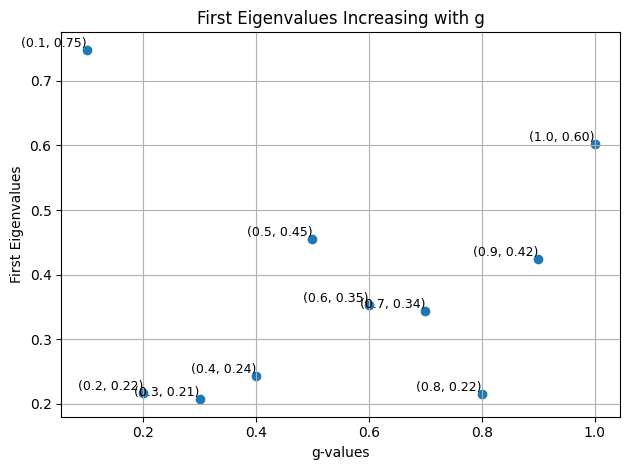

In [ ]:
state = 11
site = 3

g_array = []
eig_val_array_first = []
eig_val_array_second = []

for g in range(1, 11):

    g = g/10

    H = h.hamiltonian(state, site, g)[0]

    eig_val, eig_vec = np.linalg.eig(H)


    psi_vec = eig_vec[:, index[0]]

    rho_site_0 = density_matrix(state, site, psi_vec, 0)

    eig_val, eig_vec = np.linalg.eig(rho_site_0)

    g_array.append(g)
    eig_val_array_first.append(eig_val[0])
    eig_val_array_second.append(eig_val[1])

plt.scatter(g_array, eig_val_array_first)
# Annotate each point
for i in range(len(g_array)):
    plt.text(g_array[i], eig_val_array_first[i], f"({g_array[i].real}, {eig_val_array_first[i].real:.2f})", fontsize=9, ha='right', va='bottom')

# Labels and styling
plt.xlabel("g-values")
plt.ylabel("First Eigenvalues")
plt.title("First Eigenvalues Increasing with g")
plt.grid(True)
plt.tight_layout()
plt.show()


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/matplotlib/collections.py:194: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/matplotlib/text.py:895: ComplexWarning: Casting complex values to real discards the imaginary part
  y = float(self.convert_yunits(self._y))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/matplotlib/text.py:754: ComplexWarning: Casting complex values to real discards the imaginary part
  posy = float(self.convert_yunits(self._y))


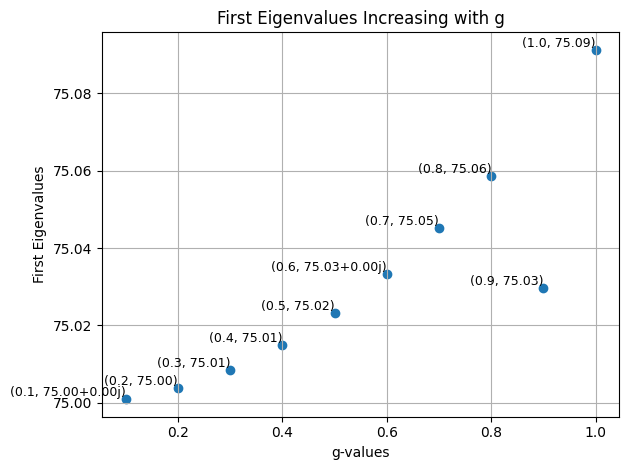

In [ ]:
for g in range(1, 11):

    g_array = []
    eig_val_array_first = []
    eig_val_array_second = []

    g = g/10

    H = h.hamiltonian(state, site, g)[0]

    eig_val, eig_vec = np.linalg.eig(H)

    for i in range(eig_val.shape[0]):
        psi_vec = eig_vec[:, index[0]]

        rho_site_0 = density_matrix(state, site, psi_vec, 0)

        g_array.append(g)
        eig_val_array_first.append(eig_val[0])
        eig_val_array_second.append(eig_val[1])

        plt.scatter(g_array, eig_val_array_first)
        # Annotate each point
        for i in range(len(g_array)):
            plt.text(g_array[i], eig_val_array_first[i], f"({g_array[i]}, {eig_val_array_first[i]:.2f})", fontsize=9, ha='right', va='bottom')

        # Labels and styling
        plt.xlabel("g-values")
        plt.ylabel("First Eigenvalues")
        plt.title("First Eigenvalues Increasing with g")
        plt.grid(True)
        plt.tight_layout()
        plt.show()


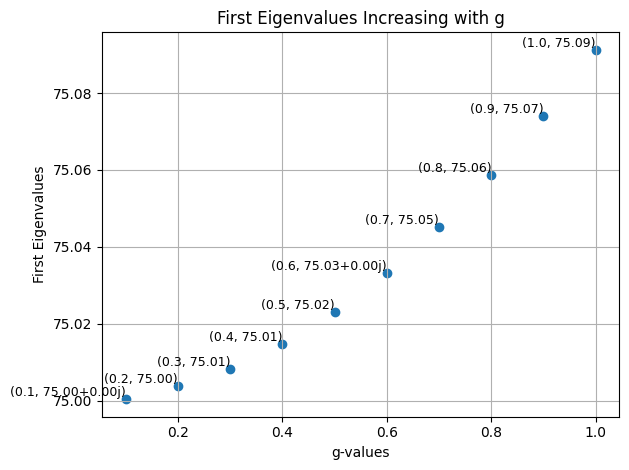

In [ ]:
plt.scatter(g_array, eig_val_array_second)
# Annotate each point
for i in range(len(g_array)):
    plt.text(g_array[i], eig_val_array_second[i], f"({g_array[i]}, {eig_val_array_second[i]:.2f})", fontsize=9, ha='right', va='bottom')

# Labels and styling
plt.xlabel("g-values")
plt.ylabel("First Eigenvalues")
plt.title("First Eigenvalues Increasing with g")
plt.grid(True)
plt.tight_layout()
plt.show()

# Density matrix analysis. (Finished)

In [4]:
def non_zero(eige_vec_slice: np.ndarray, sort: bool=False, eigen_val: np.ndarray=[], threshold: float = 1e-13) -> np.ndarray:

    nonzero_indices = np.where(np.abs(eige_vec_slice) > threshold)[0]

    if sort:
        nonzero_indices = np.array(nonzero_indices)[np.argsort(eigen_val[nonzero_indices])]

    return nonzero_indices

def zero(eige_vec_slice: np.ndarray, sort: bool=False, eigen_val: np.ndarray=[], threshold: float = 1e-13) -> np.ndarray:

    nonzero_indices = np.where(np.abs(eige_vec_slice) < threshold)[0]

    if sort:
        nonzero_indices = np.array(nonzero_indices)[np.argsort(eigen_val[nonzero_indices])]

    return nonzero_indices

In [5]:
def degenaret_increasing(eigen_val: np.ndarray, indices: np.ndarray, threshold: float = 1e-13) -> np.ndarray:

    unique_vals, counts = np.unique(eigen_val, return_counts=True)
    repeated_vals = set(unique_vals[counts > 1])

    unique_indices = [i for i in indices if eigen_val[i] in repeated_vals]

    sorted_indices = np.array(unique_indices)[np.argsort(eigen_val[unique_indices])]

    return sorted_indices

def non_degenaret_increasing(eigen_val: np.ndarray, indices: np.ndarray, threshold: float = 1e-13) -> np.ndarray:

    unique_vals, counts = np.unique(eigen_val, return_counts=True)
    repeated_vals = set(unique_vals[counts > 1])

    unique_indices = [i for i in indices if eigen_val[i] not in repeated_vals]

    sorted_indices = np.array(unique_indices)[np.argsort(eigen_val[unique_indices])]

    return sorted_indices

# Density energystates aproxipation to many site systems. (Work)

In [6]:
state = 11
site = 3
g = 0.1

H_K_V = h.hamiltonian(state, site, g)

H = H_K_V[0]
K = H_K_V[1]
V = H_K_V[2]

eig_val, eig_vec = np.linalg.eig(H)

index = np.argsort(eig_val)

psi_vec = eig_vec[:, index[0]] 
rho_site_0 = density_matrix(state, site, psi_vec, 0)
eig_val_D, eig_vec_D = np.linalg.eig(rho_site_0)

In [7]:
eigenstates_included = 5

matrix_p_to_mu = eig_vec_D[:, 0:eigenstates_included]

matrix_p_to_mu.shape

(11, 5)

In [8]:
K.shape

(11, 11)

In [9]:
V = V.reshape(state**2,state**2)

In [10]:
matrix_p_to_mu.shape

(11, 5)

In [11]:
K_mu = matrix_p_to_mu.T.conj() @ K @ matrix_p_to_mu
V_mu = np.kron(matrix_p_to_mu.T.conj(), matrix_p_to_mu.T.conj()) @ V @ np.kron(matrix_p_to_mu, matrix_p_to_mu)
V_mu

array([[ 0.         +0.j, -0.         +0.j, -0.         +0.j, -0.         +0.j,  0.         +0.j, -0.         +0.j,  1.002321884+0.j,  0.         +0.j,  0.         +0.j, -0.         +0.j, -0.         +0.j,  0.         +0.j,  0.         +0.j,  0.         +0.j, -0.         +0.j, -0.         +0.j,  0.         +0.j,  0.         +0.j,  0.498838455+0.j, -0.         +0.j,  0.         +0.j, -0.         +0.j, -0.         +0.j, -0.         +0.j,  0.         +0.j],
       [-0.         +0.j, -0.         +0.j,  0.         +0.j,  0.         +0.j, -0.         +0.j, -1.002321884+0.j,  0.         +0.j,  0.706542821+0.j, -0.         +0.j,  0.         +0.j, -0.         +0.j,  0.         +0.j,  0.         +0.j, -0.         +0.j,  0.         +0.j,  0.         +0.j,  0.         +0.j, -0.         +0.j, -0.         +0.j,  0.353012404+0.j,  0.         +0.j, -0.         +0.j, -0.         +0.j,  0.         +0.j, -0.         +0.j],
       [-0.         +0.j,  0.         +0.j, -0.         +0.j, -0.         +0.j,  0

In [12]:
V_mu = V_mu.reshape(eigenstates_included,eigenstates_included,eigenstates_included,eigenstates_included)

In [13]:
# K_mu = matrix_p_to_mu.T.conj() @ K @ matrix_p_to_mu
# V = np.kron(matrix_p_to_mu.T.conj(), matrix_p_to_mu.T.conj()) @ V_mu @ np.kron(matrix_p_to_mu, matrix_p_to_mu) 

In [14]:
# K_mu = eig_vec_D.T.conj() @ K @ eig_vec_D
# V_mu = (eig_vec_D.T.conj())**2 @ V @ eig_vec_D**2

In [15]:
K_mu_final = h.H_kinetic(K_mu.shape[0],3,K_mu)
K_mu_final.shape

(125, 125)

In [16]:
V_mu_final = h.H_potential(K_mu.shape[0],3,V_mu, 1)
V_mu_final.shape

(125, 125)

In [17]:
H_mu_3 = h.hamiltonian(state, 5, g, K_mu, V_mu, True)[0]
H_mu_3.shape

(3125, 3125)

In [18]:
H_test = h.hamiltonian(K_mu.shape[0], site, g)[0]
H_test.shape

(125, 125)

In [19]:
eig_val_H_test, eig_vec_H_test = np.linalg.eig(H_test)
index_D = np.array(np.arange(0,11,1))[np.argsort(eig_val_H_test[np.arange(0,11,1)])]
eig_val_H_test[index_D]

array([-0.020101689+0.j,  0.781612169+0.j,  0.941737751+0.j,  0.941737751+0.j,  1.08738856 +0.j,  1.095467436+0.j,  1.800627949+0.j,  2.096945473+0.j, 12.001130316+0.j, 12.002789595+0.j, 12.002789596+0.j])

In [20]:
eig_val_H_mu_3, eig_vec_H_mu_3 = np.linalg.eig(H_mu_3)
index_D_mu = np.array(np.arange(0,11,1))[np.argsort(eig_val_H_mu_3[np.arange(0,11,1)])]
eig_val_H_mu_3[[index_D_mu]]

array([[-0.031376326+0.j,  0.767837039+0.j,  0.896786099+0.j,  0.896786099+0.j,  0.925332226+0.j,  0.925332226+0.j,  1.075325399+0.j, 20.001358864+0.j, 20.001359319+0.j, 20.004692314+0.j, 20.004692314+0.j]])

In [21]:
index = np.argsort(eig_val_H_mu_3)

psi_vec = eig_vec_H_mu_3[:, index[0]] 
rho_site_0_mu = density_matrix(K_mu.shape[0], 5, psi_vec, 0)
eig_val_D_mu, eig_vec_D_mu = np.linalg.eig(rho_site_0_mu)

In [22]:
eig_vec_D.T @ rho_site_0 @ eig_vec_D

array([[ 0.992859707+0.j,  0.         +0.j,  0.         +0.j, -0.         +0.j,  0.         +0.j,  0.         +0.j,  0.         +0.j, -0.         +0.j,  0.         +0.j, -0.         +0.j,  0.         +0.j],
       [ 0.         +0.j,  0.006034995+0.j,  0.         +0.j, -0.         +0.j, -0.         +0.j, -0.         +0.j, -0.         +0.j, -0.         +0.j,  0.         +0.j, -0.         +0.j,  0.         +0.j],
       [ 0.         +0.j,  0.         +0.j,  0.000002021+0.j,  0.         +0.j,  0.         +0.j, -0.         +0.j, -0.         +0.j,  0.         +0.j, -0.         +0.j,  0.         +0.j, -0.         +0.j],
       [-0.         +0.j,  0.         +0.j,  0.         +0.j,  0.00110235 +0.j, -0.         +0.j, -0.         +0.j, -0.         +0.j,  0.         +0.j,  0.         +0.j, -0.         +0.j,  0.         +0.j],
       [ 0.         +0.j, -0.         +0.j,  0.         +0.j, -0.         +0.j,  0.000000928+0.j,  0.         +0.j, -0.         +0.j, -0.         +0.j, -0.         +0.j,  0

In [23]:
rho_site_0_mu

array([[ 0.993680679+0.j, -0.         +0.j,  0.000285652+0.j, -0.         +0.j, -0.         +0.j],
       [-0.         +0.j,  0.005090944+0.j,  0.         +0.j, -0.         +0.j, -0.         +0.j],
       [ 0.000285652+0.j,  0.         +0.j,  0.000001887+0.j, -0.         +0.j,  0.         +0.j],
       [-0.         +0.j, -0.         +0.j, -0.         +0.j,  0.0012256  +0.j, -0.         +0.j],
       [-0.         +0.j, -0.         +0.j,  0.         +0.j, -0.         +0.j,  0.000000891+0.j]])

# Density energystates aproxipation to many site systems. (Finished)

In [24]:
def hamiltonian_new(state: int, site: int, g: float) -> np.ndarray:

    state_old = 11
    site_old = 3
    g_old = 0.1

    H_K_V = h.hamiltonian(state_old, site_old, g_old)

    H = H_K_V[0]
    K = H_K_V[1]
    V = H_K_V[2]

    eig_val, eig_vec = np.linalg.eig(H)

    index = np.argsort(eig_val)

    psi_vec = eig_vec[:, index[0]] 
    rho_site_0 = density_matrix(11, 3, psi_vec, 0)
    eig_val_D, eig_vec_D = np.linalg.eig(rho_site_0)

    matrix_p_to_mu = eig_vec_D[:, 0:state]

    V = V.reshape(state_old**2,state_old**2)
    K_mu = matrix_p_to_mu.T.conj() @ K @ matrix_p_to_mu
    V_mu = np.kron(matrix_p_to_mu.T.conj(), matrix_p_to_mu.T.conj()) @ V @ np.kron(matrix_p_to_mu, matrix_p_to_mu)
    V_mu = V_mu.reshape(state,state,state,state)

    H_mu = h.hamiltonian(state, site, g, K_mu, V_mu, True)[0]

    return H_mu

In [25]:
H_new = hamiltonian_new(5, 5, 0.1)

In [26]:
eig_val_H_new, eig_vec_H_new = np.linalg.eig(H_new)